## Data Preprocessing

In [30]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

In [31]:
bank_additional_full_df=pd.read_csv('bank-additional-full.csv',sep=';')

In [32]:
print(bank_additional_full_df.columns)
bank_additional_full_df.shape

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


(41188, 21)

In [33]:
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [34]:
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
#null check
bank_additional_full_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [36]:
## binning age variable
def treat_age(data):
    #getting marital status of groupby people
    age_group_names = ['young', 'lower middle', 'middle', 'senior']
    data['age_binned'] = pd.qcut(data['age'], 4, labels = age_group_names)
    gb_marital_age = data['y'].groupby([data['marital'],data['age_binned']] )
    #getting life stage of age group
    #data['life_stage'] = data.apply(lambda x: x['age_binned'] +' & ' + x['marital'], axis = 1)
    data = data.drop(['age'],axis=1)
    return data


bank_additional_full_df = treat_age(bank_additional_full_df)

In [37]:
# helper functions to classify variables and process dummy variables
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

def determine(df):
    list1 = []
    list2 = []
    for col in bank_additional_full_df.columns:
        if df[col].dtype == object:
            list1.append(col)
        else:
            list2.append(col)
    return list1,list2

def preprocess(df,list1):
    for i in list1:
        df = create_dummies(df,i)
    return df

In [38]:
list1,list2 = determine(bank_additional_full_df)
bank_additional_full_df = preprocess(bank_additional_full_df,list1)

In [39]:
bank_additional_full_df[list2].head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_binned
0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,senior
1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,senior
2,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,lower middle
3,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,middle
4,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,senior


We also need clear up high correlations by breakinging one-hot encoding features onc i.e, remove one feature from final encoding 
(except for month since, there are 10 months instead of 12). This will help eliminate potential collinearity issues.

In [41]:
#We need need to encode age bins which wasn't caught by our helper functions earlier. 
print(list2)
list2.pop()

['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'age_binned']


'age_binned'

In [42]:
print(list1)
bank_additional_full_df.columns

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'age_binned', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telep

In [43]:
list3= ['job_unknown','default_no','housing_no','marital_unknown','education_illiterate','loan_no','contact_telephone','age_binned_young','day_of_week_fri','poutcome_failure']
for i in list3:
    list1.append(i)

In [45]:
# additional cleanup and min max scaling numerics
from sklearn.preprocessing import MinMaxScaler
def clean_up(df,list,list2):
    df = create_dummies(df,'age_binned')
    df = df.drop(list,axis=1)
    df = df.drop('age_binned',axis=1)
    df = df.drop('y_no',axis=1)
    scaler = MinMaxScaler(feature_range=(0,1))
    df[list2] = scaler.fit_transform(df[list2])
    return df

In [47]:
bank_additional_full_df = clean_up(bank_additional_full_df,list1,list2)

In [48]:
bank_additional_full_df.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes,age_binned_lower middle,age_binned_middle,age_binned_senior
0,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,0,0,1
1,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,0,0,1
2,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,1,0,0
3,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,1,...,1,0,0,0,1,0,0,0,1,0
4,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,0,0,1


In [50]:
#Train test split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def splits(data, test_size, seed):
    X = data.drop('y_yes',axis=1)
    Y = data['y_yes']
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    return X_train, X_test, y_train,y_test

In [51]:
X_train, X_test, y_train,y_test = splits(bank_additional_full_df, test_size= 0.33, seed =7)

## Predictive Modelling

In [58]:
# Helper funtion for ROC analysis
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
def roc_analysis(y,prob):
    fpr, tpr, thresholds = roc_curve(y, prob[:,1])
    #roc_auc = auc(fpr,tpr)
    roc_auc =roc_auc_score(y, prob[:,1])
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [59]:
## helper function to fit model and returns evaluation metrics

def regular_fit(X_train,y_train,X_test,y_test,model):        
    mod= model
    mod.fit(X_train,y_train)
    predictions = mod.predict(X_test)
    probabilities = mod.predict_proba(X_test)
    score =mod.score(X_test,y_test)
    print("Model Score: {}".format(score))
    print(classification_report(y_test,predictions)) 
    roc_analysis(y_test,probabilities)

Model Score: 0.9067166924152137
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     12105
          1       0.61      0.41      0.49      1488

avg / total       0.90      0.91      0.90     13593



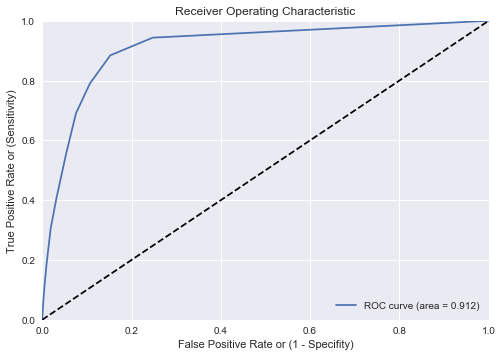

In [60]:
regular_fit(X_train,y_train,X_test,y_test, model =RandomForestClassifier(random_state=42))

The model performs fairly well with an overall accuracy of 90.6% . The AUC score of 0.912 looks great! However, we notice a 61% precision, 41% recall and 0.49 F1 score for the positive class i.e, subscription of the term deposit. This can be expected due to the huge imbalance in classes (only around 11% of positive responses are observed in the whole dataset). To deal with this, let us use an over sampling algorithm called SMOTE to oversample the minority class.

In [61]:
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced

In [66]:
def imbalance_fit(X_train,y_train,X_test,y_test,model):   
    
    smote_pipeline = make_pipeline_imb(SMOTE(random_state=4),model)
    smote_model = smote_pipeline.fit(X_train,y_train)
    smote_prediction = smote_model.predict(X_test)
    probabilities = smote_model.predict_proba(X_test)
    score =model.score(X_test,y_test)
    print("Model Score: {}".format(score))
    print(classification_report(y_test,smote_prediction))
    roc_analysis(y_test,probabilities)

Model Score: 0.9031118958287354
             precision    recall  f1-score   support

          0       0.95      0.95      0.95     12105
          1       0.56      0.56      0.56      1488

avg / total       0.90      0.90      0.90     13593



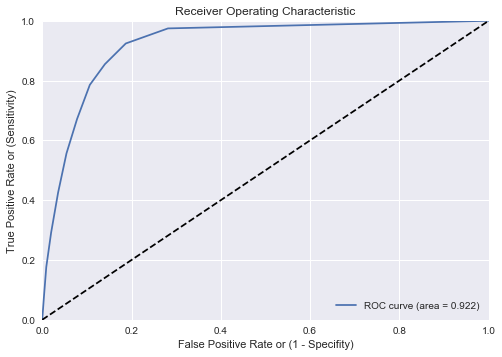

In [67]:
imbalance_fit(X_train,y_train,X_test,y_test, model =RandomForestClassifier(random_state=42))

The accuracy virtually remains unchanged. We can notice a slight increase 1% in AUC. We see a decent increase in F1 score and a 15% increase in recall at the cost of precision reducing by 5%. I would say this is a good trade-off. Precision refers to fraction of classified positives that are correct. Recall refers to the percentage of overall positives predicted correctly. A reduced precision would mean that there ae more false positives. In marketing false positives are usually tolerated for more correct predictions.


Let us now, try another model, that of a Multi Layerd Perceptron.

Model Score: 0.9099536526153167
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     12105
          1       0.63      0.42      0.50      1488

avg / total       0.90      0.91      0.90     13593



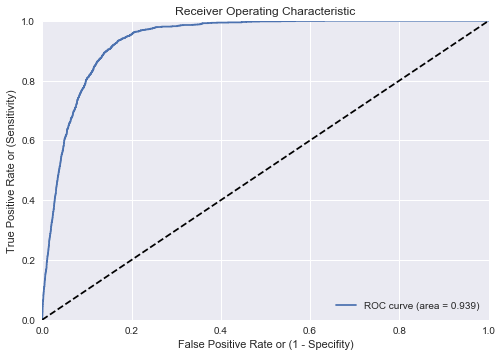

In [76]:
from sklearn.neural_network import MLPClassifier
regular_fit(X_train,y_train,X_test,y_test, model = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500))

We observe an increase of AUC of 0.939. However, we see that f1 score isn't much of an improvement compared to the last model. It is better than the original randomforest model (without SMOTE) earlier. Let us see how oversampling helps out.

Model Score: 0.8533068491135143
             precision    recall  f1-score   support

          0       0.98      0.85      0.91     12105
          1       0.42      0.88      0.57      1488

avg / total       0.92      0.85      0.87     13593



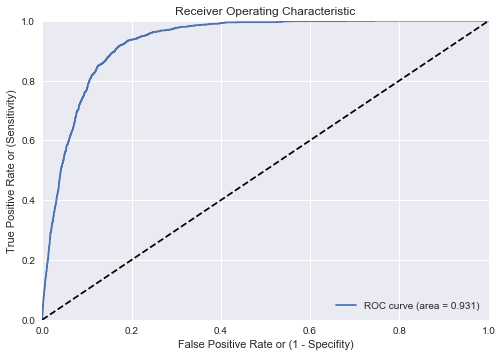

In [69]:
imbalance_fit(X_train,y_train,X_test,y_test, model = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500))

Here we see an accuracy drop of 5% compared to the previous model (which can be expected from oversampling). We can see that f1 score has increased from 0.5 to 0.57. Most significant increase can be observed in recall which rose from 42% to 88%. The precision dropped a lot from 63% to 42%. This is great. While, the number of false alarms might have increased, the model picked up 88% of positives as true positives!

Let us now assess the reliability of diffeent algorithms using 10 fold cv

In [70]:
# Compare Different Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [71]:
# Compare Different Algorithms

X = bank_additional_full_df.drop('y_yes',axis=1)
Y = bank_additional_full_df['y_yes']
# prepare models
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' CART ' , DecisionTreeClassifier()))
models.append(( ' NB ' , GaussianNB()))
models.append(( ' SVM ' , SVC()))
models.append(( ' MLP ' , MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)))
models.append(( ' RF ' , RandomForestClassifier(random_state = 42)))

In [72]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : 0.901080 (0.097432)


C:\Users\nrssm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\nrssm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\nrssm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\nrssm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\nrssm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\nrssm\AppData\Local\Continuum\Anaconda3\lib\site-package

 LDA : 0.885126 (0.145001)
 KNN : 0.886973 (0.113500)
 CART : 0.879326 (0.102538)
 NB : 0.719353 (0.250317)
 SVM : 0.885880 (0.122010)
 MLP : 0.897827 (0.100098)
 RF : 0.892460 (0.108857)


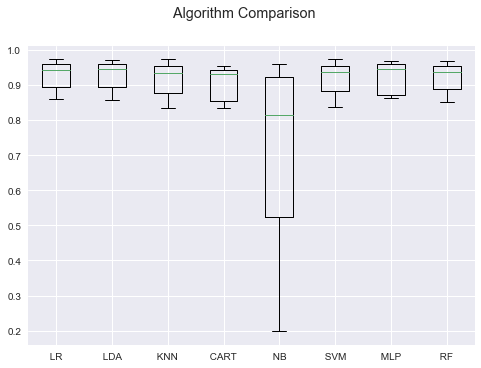

In [73]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LDA seems to be extremely reliable compared to other models in terms of mean and variation in scores.

C:\Users\nrssm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Model Score: 0.9111307290517178
             precision    recall  f1-score   support

          0       0.94      0.96      0.95     12105
          1       0.61      0.52      0.56      1488

avg / total       0.91      0.91      0.91     13593



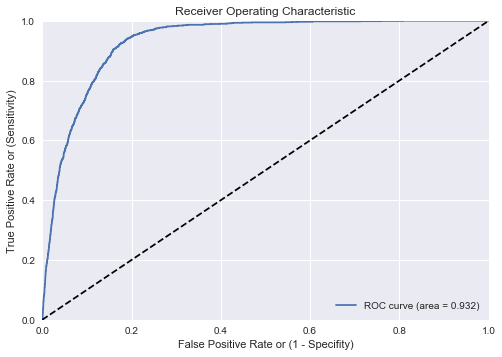

In [77]:
regular_fit(X_train,y_train,X_test,y_test, model =LinearDiscriminantAnalysis())

C:\Users\nrssm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Model Score: 0.8577944530272935
             precision    recall  f1-score   support

          0       0.98      0.86      0.91     12105
          1       0.43      0.86      0.57      1488

avg / total       0.92      0.86      0.88     13593



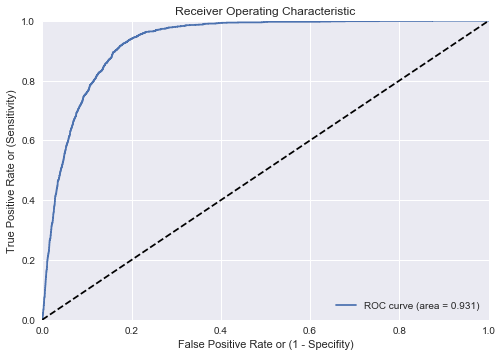

In [78]:
imbalance_fit(X_train,y_train,X_test,y_test, model =LinearDiscriminantAnalysis())

Our most reliable model produces an accuracy of 85.7% AUC of 0.931 and recall of 86%.